In [1]:
import sys
sys.path.append('../lib')
from table_detection import Signal, LineDetection, Table
from openfoodfacts import OFFImage
from utils import convert_to_dict
import cv2
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
base_path = 'C:\\Users\\sadok.guermazi\\Documents\\Projects\\Open Food Facts' 
df = pd.read_csv(os.path.join(base_path,'dump.csv'),encoding='utf8')

## OFF Image Class

In [3]:
from collections import namedtuple
Rectangle = namedtuple('Rectangle', 'xmin ymin xmax ymax')

In [4]:
product_barcode = 3067162275285
image_number = 2
#if barcode is abcdefghijklm, image id will be abc/def/ghi/jklm/image_number.jpg where image_number is an integer 
prod_id = "/"+str(product_barcode)[:3]+"/"+str(product_barcode)[3:6]+"/"+str(product_barcode)[6:9]+"/"+str(product_barcode)[9:]+"/"+str(image_number)+".jpg"

crop = convert_to_dict(df[df.barcode==product_barcode]['data'].iloc[0])['annotation']['crop']

json_ocr = [x for x in convert_to_dict(df[df.barcode==product_barcode]['data'].iloc[0])['annotation']['textAnnotations'].values() if 'locale' not in x.keys()]

#Define table_bbx as a Rectangle
table_bbx = Rectangle(crop['start']['x'],crop['start']['y'],crop['end']['x'],crop['end']['y'])


url = 'https://static.openfoodfacts.org/images/products'+prod_id

In [5]:
off_image = OFFImage(url, table_bbx = table_bbx, json_ocr = json_ocr)

In [6]:
off_image.get_image()
off_image.get_ocr()
off_image.find_words_included_in_nutrition_table()
off_image.find_words_relative_coordinates()

In [7]:
img = off_image.image.copy().astype(np.uint8)
for word_ocr in off_image.ocr[:100]:
    cv2.polylines(img,
                        [np.array([[x['x'],x['y']] for x in word_ocr.bounding_box])],
                        isClosed=True,thickness=2,color=(255,255,255),lineType = cv2.LINE_AA)

In [8]:
off_image.rotate()

In [15]:
img = off_image.corrected_image.copy().astype(np.uint8)
for word_ocr in [x for x in off_image.ocr[:100] if x.included_in_nutrition_table]:
    cv2.polylines(img,
                        [np.array([[x['x'],x['y']] for x in word_ocr.relative_bounding_box])],
                        isClosed=True,color=(255,255,255),thickness=2,lineType = cv2.LINE_AA)

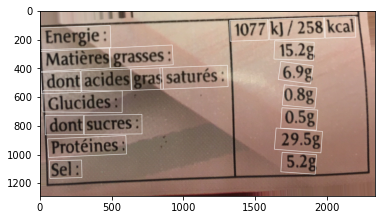

In [16]:
plt.imshow(img)

In [17]:
img = off_image.image.copy().astype(np.uint8)
for word_ocr in off_image.ocr[:100]:
    cv2.polylines(img,
                        [np.array([[x['x'],x['y']] for x in word_ocr.bounding_box])],
                        isClosed=True,thickness=2,color=(255,255,255),lineType = cv2.LINE_AA)

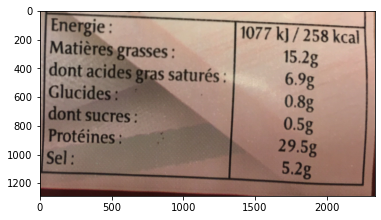

In [18]:
plt.imshow(off_image.cropped_image)

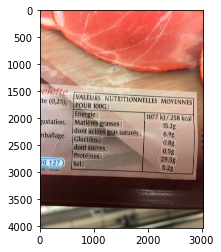

In [19]:
plt.imshow(img)